<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up </B> for Health - Deep Learning + No Shows</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote </B>and<b> 🍏 ShowUp </b>helper class</B></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
<ol>
<li><B>Problem statement</B>: A clear description of the problem the project aims to solve.</li><BR>
<li><B>Data source</B>: Information on where the data used in the project is obtained from.</li><BR>
<li><B>Libraries used</B>: A list of the Python libraries used in the project and a brief explanation of their role. Include library version.</li><BR>
<li><B>Exploratory Data Analysis (EDA)</B>: A summary of the initial findings from exploring the data.</li><BR>
<li><B>Preprocessing</B>: Steps taken to clean and prepare the data for model building.</li><BR>
<li><B>Model building</B>: An overview of the model used and the reasoning behind its selection.</li><BR>
 Precision = $\frac{\text{true positives}}{\text{true positives + false positives}}$, Recall = $\frac{\text{true positives}}{\text{true positives + false negatives}}$, F1 = $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}$</li><BR><BR>
<li><B>Model evaluation</B>: Evaluation metrics used to assess the performance of the model and results of the evaluation.</li><BR>
<li><B>Conclusion</B>: A summary of the findings and recommendations for further work.</li>
</ol>
</div>

#  🍏 Loading Helper Class

wandb_api_key: 651204c459ad2877b0d32ae2f37ce28d159a9cbe

In [35]:
import wandb
wandb.login()

True

In [2]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

# 📙 Loading Libraries

In [3]:
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from showupforhealth.params import *
from showupforhealth.utils import *


# 💾 Build Surgery Datasets
Merge **Appointment Data** with **Surgery Disease Register**, Weather and IMD2023

In [4]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.shape

(717792, 37)

In [5]:
# Define X and y
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (717792, 36)
y - dependant variable - Appointment_status: (717792,)


In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, val_size=0.2, test_size=0.1)

✅ OUTPUT: X_train, X_val, X_test, y_train, y_val, y_test
Train Set:  X_train, y_train - (502453, 36), (502453,)
  Val Set:  X_val, y_val - - - (143559, 36), (143559,)
 Test Set:  X_test, y_test - - (71780, 36), (71780,)


In [102]:
X_test.to_csv(f'{OUTPUT_DATA}X_test.csv', index=False)

In [103]:
y_test.to_csv(f'{OUTPUT_DATA}y_test.csv', index=False)

In [104]:
X_val.to_csv(f'{OUTPUT_DATA}X_val.csv', index=False)

In [105]:
y_val.to_csv(f'{OUTPUT_DATA}y_val.csv', index=False)

## 🚧 Under sample

In [40]:
df_under = undersample_majority(data, 'Appointment_status', undersample_factor=3)
df_under.shape

(137536, 37)

In [41]:
df_under['Appointment_status'].value_counts(normalize=True)

1    0.75
0    0.25
Name: Appointment_status, dtype: float64

In [42]:
df_under['Appointment_status'].value_counts(normalize=False)

1    103152
0     34384
Name: Appointment_status, dtype: int64

## Define X and y

In [43]:
# Define X and y
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (137536, 36)
y - dependant variable - Appointment_status: (137536,)


# ✂️ Split data

In [44]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, val_size=0.2, test_size=0.1)

✅ OUTPUT: X_train, X_val, X_test, y_train, y_val, y_test
Train Set:  X_train, y_train - (96274, 36), (96274,)
  Val Set:  X_val, y_val - - - (27508, 36), (27508,)
 Test Set:  X_test, y_test - - (13754, 36), (13754,)


# ⚖️ Class imbalance
Including **distribution of imbalance** within train, val and test sets.

# 🔁 Oversampling SMOTE

In [7]:
# Oversampling with SMOTE
X_train_os, y_train_os = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(530757, 36) y_train_os :(530757,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the sampler
rus = RandomUnderSampler(sampling_strategy=0.33, random_state=42)

# Assume X_train and y_train are your features and labels respectively
X_resampled, y_resampled = rus.fit_resample(X_train_os, y_train_os)

In [9]:
X_resampled.shape

(194462, 36)

In [ ]:
# How many "fraud" samples do I have in each split?
print("DNAs in X_train_o post-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train_o).value_counts()[0]} DNAs in the train set")

In [19]:
#Scale data
# Fit the scaler on the training data
scaler = fit_scaler(X_resampled, scaler_type='minmax')

In [20]:
# Use the fitted scaler to transform both training and test datasets
X_train_scaled = transform_data(X_resampled, scaler)
X_val_scaled = transform_data(X_val, scaler)
X_test_scaled = transform_data(X_test, scaler)

# 🧠 Neural Network iterations

In [36]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): # defining a custom F1 score metric
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

metrics = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
    f1_score,  # adding the custom F1 score metric
#     keras.metrics.TruePositives(name='tp'),
#     keras.metrics.FalsePositives(name='fp'),
#     keras.metrics.TrueNegatives(name='tn'),
#     keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [37]:
def plot_loss_precision_recall_curve(history):

    fig, ax = plt.subplots(3, 2, figsize=(20, 15))

    # --- LOSS 
    ax[0, 0].plot(history.history['loss'], color="#a10606")
    ax[0, 0].plot(history.history['val_loss'], color="#1b5743")
    ax[0, 0].set_title('Model loss', fontsize = 18)
    ax[0, 0].set_ylabel('Loss', fontsize = 14)
    ax[0, 0].legend(['Train', 'Val'], loc='upper right')
    ax[0, 0].grid(axis="x", linewidth=0.5)
    ax[0, 0].grid(axis="y", linewidth=0.5)

    # --- RECALL
    ax[0, 1].plot(history.history['recall']) 
    ax[0, 1].plot(history.history['val_recall'])
    ax[0, 1].set_title('Model recall', fontsize = 18)
    ax[0, 1].set_ylabel('Recall', fontsize = 14) 
    ax[0, 1].legend(['Train', 'Val'], loc='lower right')
    ax[0, 1].grid(axis="x", linewidth=0.5)
    ax[0, 1].grid(axis="y", linewidth=0.5)

    # --- PRECISION
    ax[1, 0].plot(history.history['precision'])
    ax[1, 0].plot(history.history['val_precision'])
    ax[1, 0].set_title('Model precision', fontsize = 18)
    ax[1, 0].set_ylabel('Precision', fontsize = 14)
    ax[1, 0].legend(['Train', 'Val'], loc='lower right')
    ax[1, 0].grid(axis="x", linewidth=0.5)
    ax[1, 0].grid(axis="y", linewidth=0.5)

    # --- F1 SCORE 
    ax[1, 1].plot(history.history['f1_score'])
    ax[1, 1].plot(history.history['val_f1_score']) 
    ax[1, 1].set_title('Model F1 Score', fontsize = 18)
    ax[1, 1].set_ylabel('F1 Score', fontsize = 14)
    ax[1, 1].legend(['Train', 'Val'], loc='lower right')
    ax[1, 1].grid(axis="x", linewidth=0.5)
    ax[1, 1].grid(axis="y", linewidth=0.5)
    
    # --- AUC
    ax[2, 0].plot(history.history['auc'])
    ax[2, 0].plot(history.history['val_auc'])
    ax[2, 0].set_title('Model AUC', fontsize = 18) 
    ax[2, 0].set_ylabel('AUC', fontsize = 14)
    ax[2, 0].legend(['Train', 'Val'], loc='lower right')
    ax[2, 0].grid(axis="x", linewidth=0.5)
    ax[2, 0].grid(axis="y", linewidth=0.5)


    ax[2, 1].plot(history.history['accuracy'])
    ax[2, 1].plot(history.history['val_accuracy'])
    ax[2, 1].set_title('Model accuracy', fontsize = 18) 
    ax[2, 1].set_ylabel('accuracy', fontsize = 14)
    ax[2, 1].legend(['Train', 'Val'], loc='lower right')
    ax[2, 1].grid(axis="x", linewidth=0.5)
    ax[2, 1].grid(axis="y", linewidth=0.5)

    # Set common labels  
    fig.text(0.5, 0.04, 'Epoch', ha='center', va='center', fontsize=14) 

    plt.show()

In [39]:
import random
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Start a run, tracking hyperparameters
wandb.init(
    # set the wandb project where this run will be logged
    project="ShowUp NEW DATA",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 128,
        "activation_1": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_2": 16,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_3": 32,
        "activation_3": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 100,
        "batch_size": 128
    }
)

Problem at: /var/folders/0l/kzz8m3n52cs0d9lhcjh_yxqm0000gn/T/ipykernel_92845/1835179715.py 6 <module>


KeyboardInterrupt: 

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

def simple_nn(input_dim, output_dim):
    model = Sequential()

    # Normalizing layer
    model.add(Input(shape=(input_dim,)))
    model.add(BatchNormalization())

    # Dense layer with 128 units
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))

    # Dense layer with 16 units
    model.add(Dense(16))
    model.add(LeakyReLU(alpha=0.01))

    # Dense layer with 32 units
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.01))

    # Output layer
    model.add(Dense(output_dim, activation='sigmoid'))

    return model

# Example usage:
input_dim = 36
output_dim = 1

model = simple_nn(input_dim, output_dim)

# Setting learning rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model for binary classification
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)

print(model.summary())

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Example training (assuming X_train, Y_train, X_val, Y_val are your datasets)
# model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 36)               144       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 128)               4736      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                2064      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                      

In [41]:
model = init_model()
#model.summary()

NameError: name 'init_model' is not defined

In [46]:
es = EarlyStopping(
    patience=80,
    monitor='val_loss', # We really want to detect fraudulent transactions!
    restore_best_weights=True)

history = model.fit(X_train_scaled, y_resampled,
                    validation_data=(X_val_scaled, y_val),
                    epochs=200,
                    batch_size=128, # Large enough to get a decent chance of containing fraudulent transactions 
                    callbacks=[es],
                     # WandbMetricsLogger(log_freq=5),
                     # WandbModelCheckpoint("models")], 
                    shuffle=True,
                    verbose=3
                   )

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [43]:
wandb.finish()


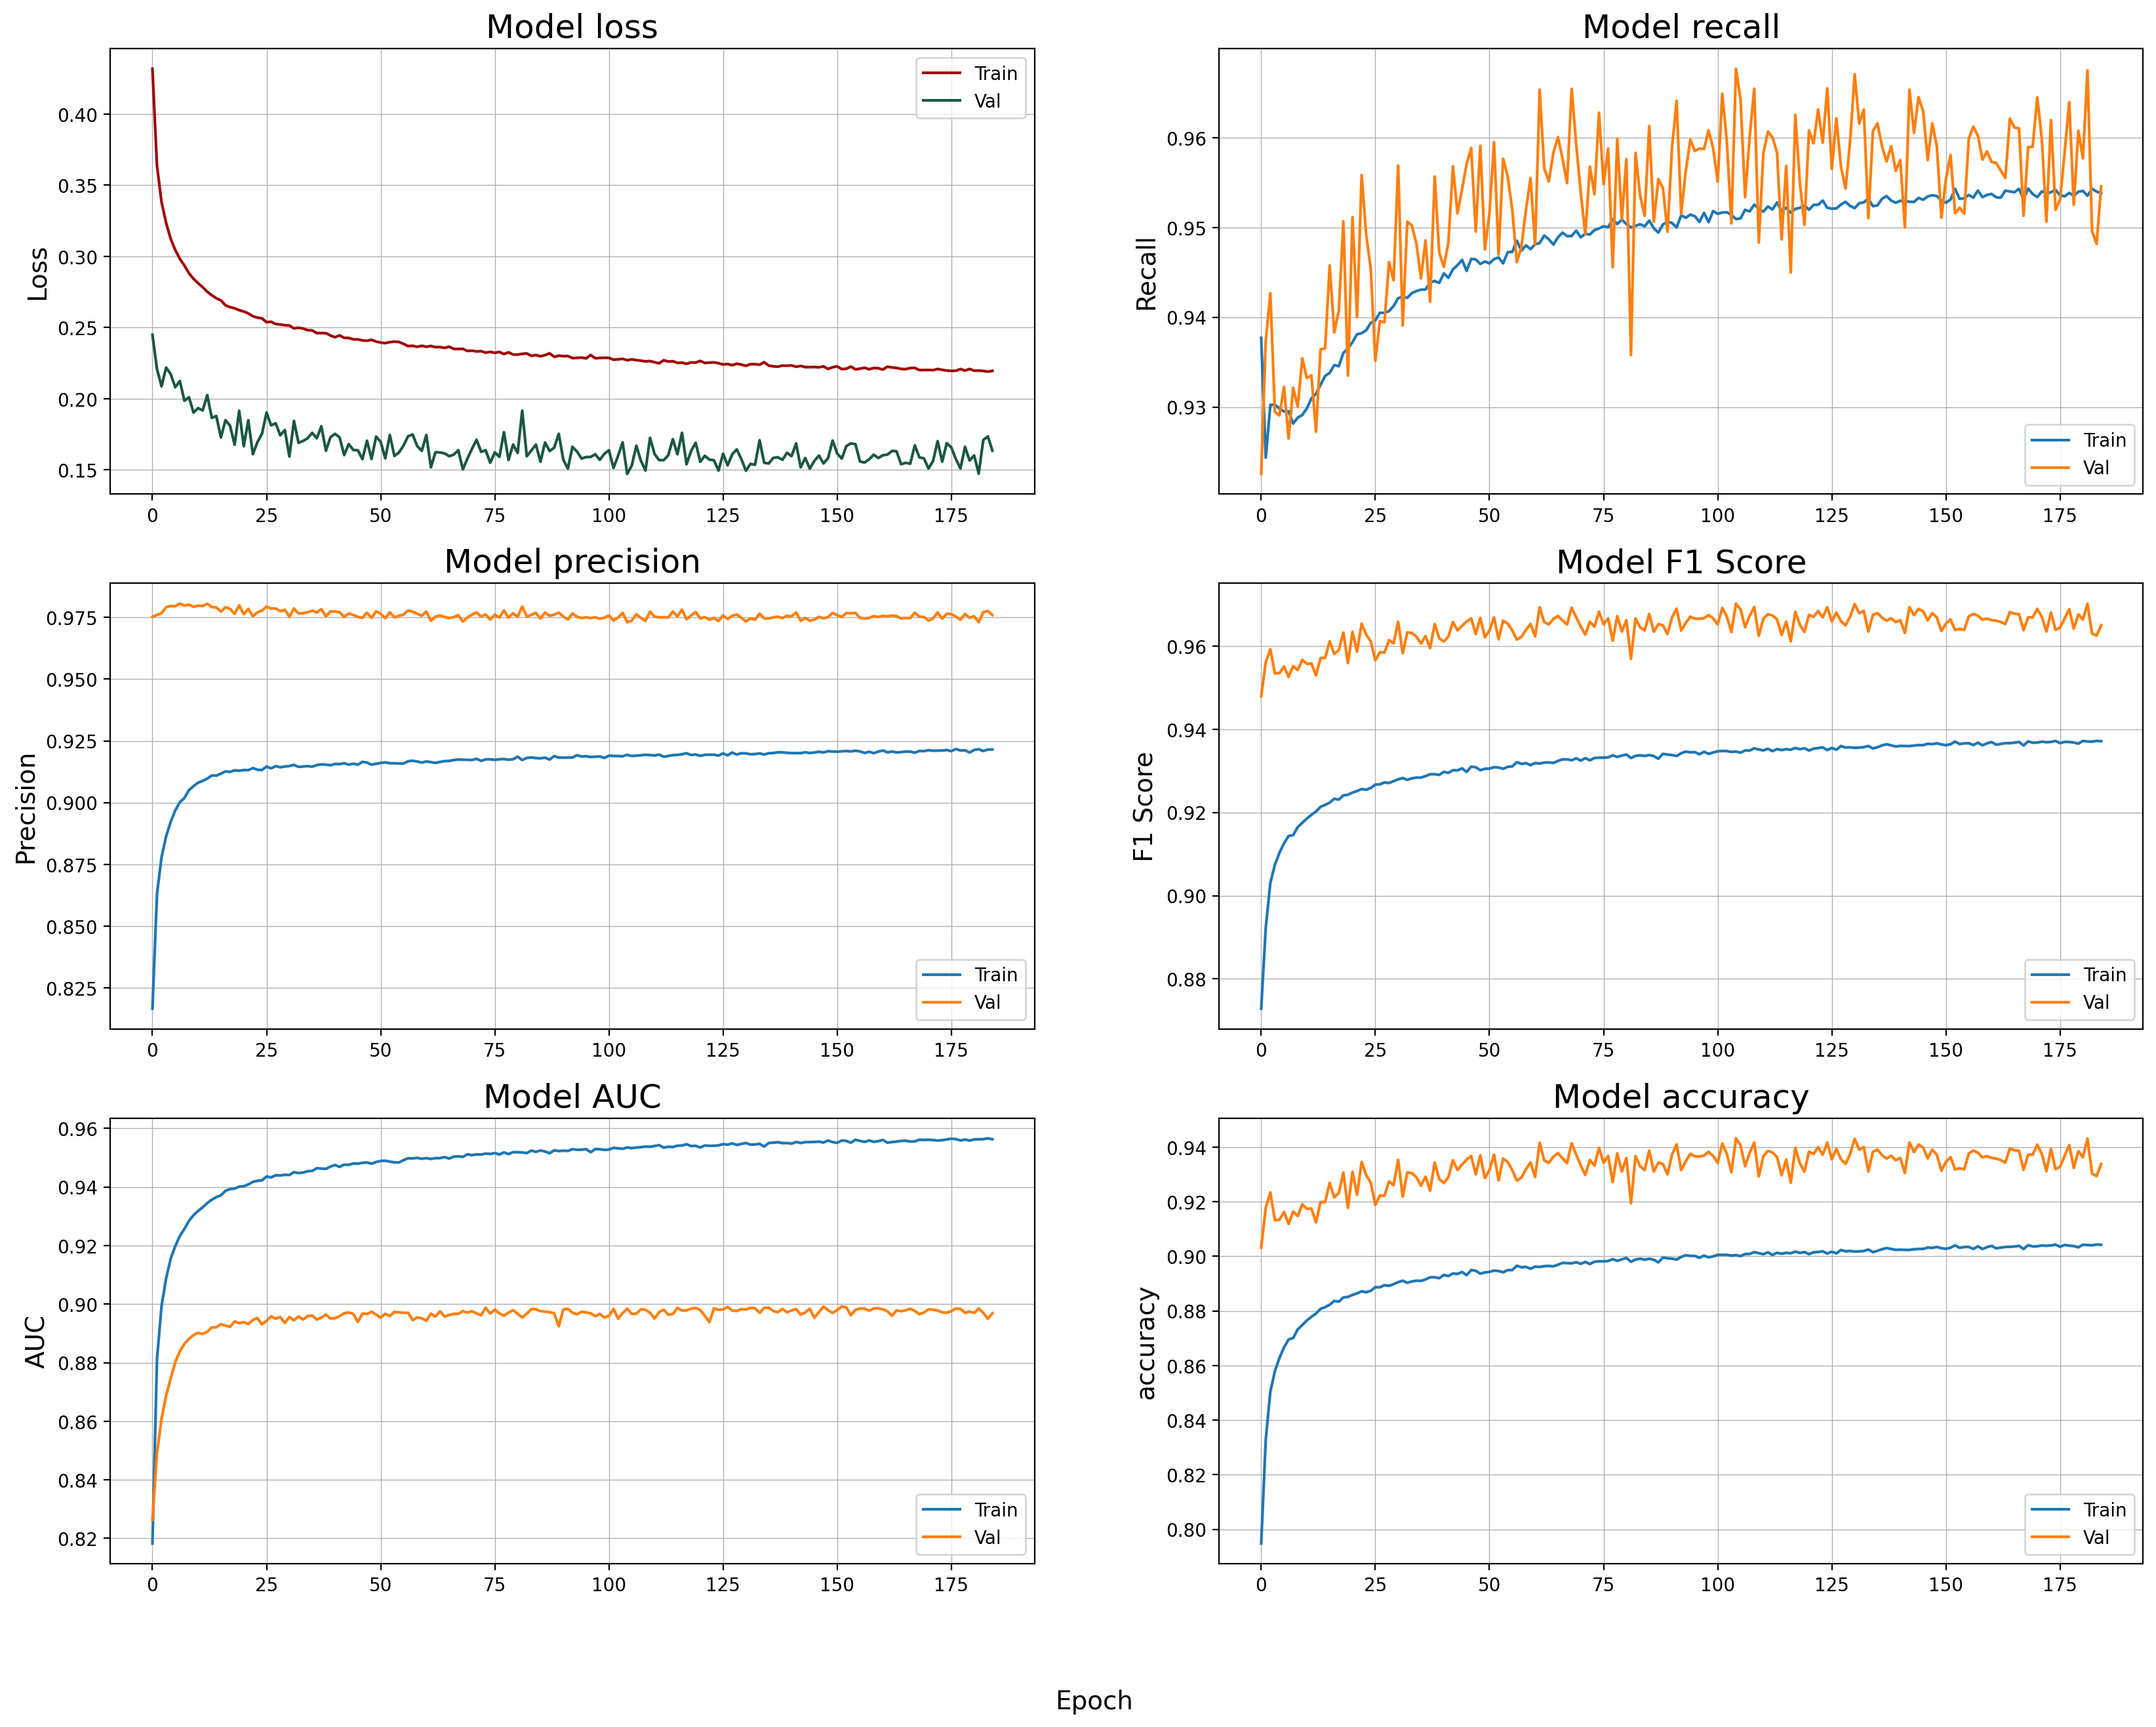

Show Up for Health


In [47]:
plot_loss_precision_recall_curve(history)
print("Show Up for Health")

# Score model on unseen dataset

In [48]:
model.predict(X_test_scaled)

2244/2244 [==============================] - 1s 319us/step


array([[0.9885962 ],
       [0.99702173],
       [0.9760715 ],
       ...,
       [0.8406326 ],
       [0.89398736],
       [0.99877447]], dtype=float32)

In [49]:
model.evaluate(X_test_scaled, y_test, verbose=0, return_dict=True)

{'loss': 0.1428299844264984,
 'cross entropy': 0.1428299844264984,
 'f1_score': 0.9705209136009216,
 'accuracy': 0.9443717002868652,
 'precision': 0.9744955897331238,
 'recall': 0.9674478769302368,
 'auc': 0.9066348075866699,
 'prc': 0.9955958127975464}

In [50]:
from datetime import datetime

now = datetime.now()
datetime_string = now.strftime("%Y-%m-%d %H-%M-%S")

model.save(f'{MODEL_OUTPUT}model_weights_{datetime_string}.h5')

In [51]:
y_pred_proba = model.predict(X_test_scaled)

2244/2244 [==============================] - 1s 319us/step


In [52]:
threshold = 0.50 # 50% 

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

## Confusion Matrix

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[ 1036,  1747],
       [ 2246, 66751]])

Text(0.5, 25.722222222222214, 'Predicted label')

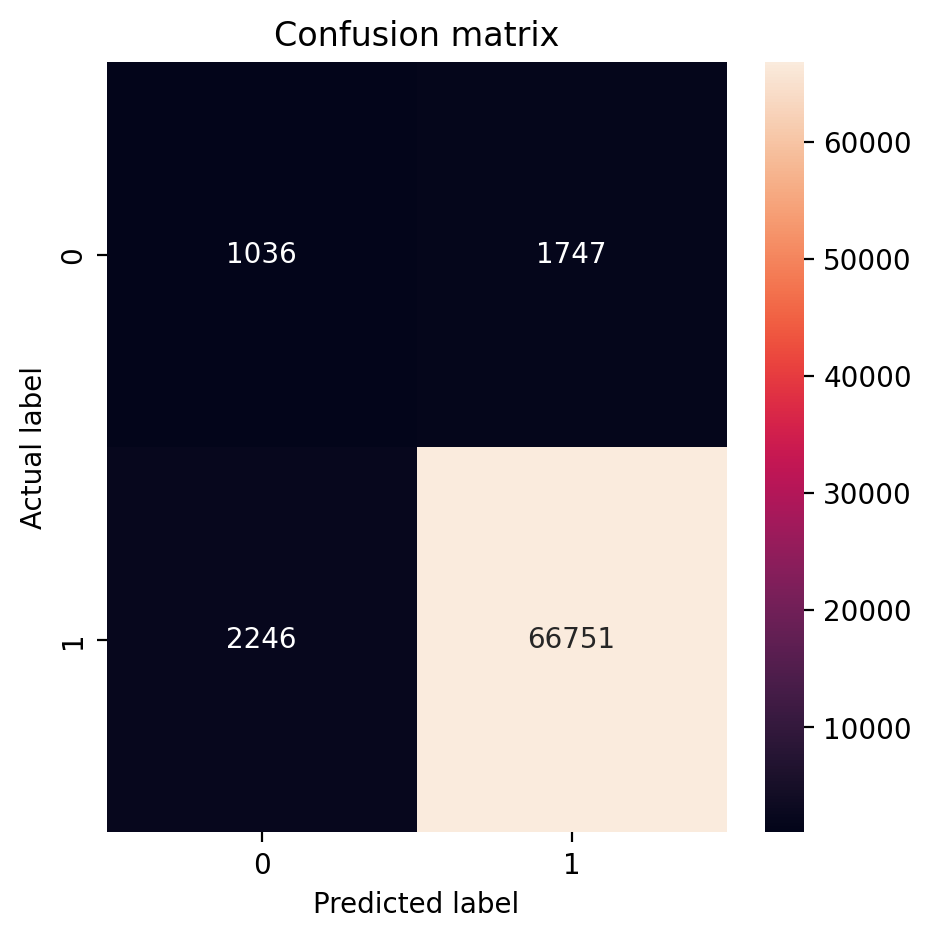

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.32      0.37      0.34      2783
           1       0.97      0.97      0.97     68997

    accuracy                           0.94     71780
   macro avg       0.65      0.67      0.66     71780
weighted avg       0.95      0.94      0.95     71780



In [56]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

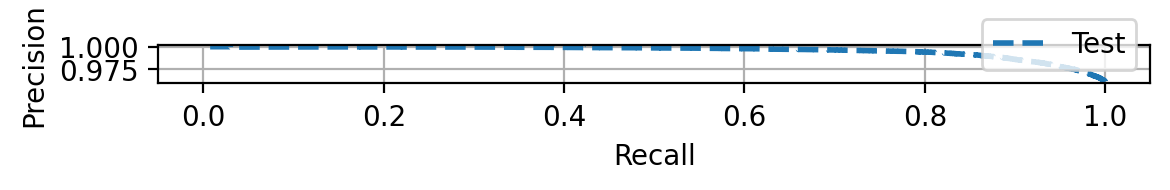

In [57]:
plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')